# Features Analysis (step 2)

In [12]:
"""
NOTE: to run notebook use: venv/bin/python manage.py shell_plus --notebook
"""

import dask.dataframe as ddf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

FEATS_PATH = "/Users/erotundo/PycharmProjects/DatasetAnnotatorProj/Analysis/Data/travel/preprocessed_threads_acceptedOnly_all_binaryBestAnswer/"
meta_cols = ['best-answer', 'thread-id', 'post-id', 'Unnamed: 0', 'Unnamed: 0.1', 'index']

# plotting settings
sns.set(style="white", palette="muted", color_codes=True)
PLOTS_PATH = 'output/travel/'
PLOTS_FORMATS = ['.pdf', '.png']

In [19]:
df_feats = ddf.read_csv(FEATS_PATH + 'development-*.csv', encoding='utf-8')

df_feats = df_feats.rename(columns=dict(zip(df_feats.columns, [col.replace("_", "-") for col in df_feats.columns]))).compute()

df_feats = df_feats.rename(columns=dict(zip(df_feats.columns, [ col.replace("cooccurrence", "COOCN") if "cooccurrence" in col else col for col in df_feats.columns])))

In [20]:
df_feats.head()

,Unnamed: 0,Unnamed: 0.1,ABAN-hits-authority,ABAN-hits-hubs,ABAN-indegree,ABAN-pagerank,ABAWN-hits-authority,ABAWN-hits-hubs,ABAWN-indegree,ABAWN-pagerank,...,ty-sipc,ty-slp,ty-sp,ty-spr,ty-sscc,ty-typo,best-answer,thread-id,index,post-id
0,0,-1.047872,-0.137627,-0.095383,-0.141864,0.117760,-0.140178,-0.097232,-0.141864,0.197820,...,0.0,-0.053097,0.0,0.0,0.0,0.0,1.0,1.0,0.0,393.0
1,1,-1.046099,8.516571,18.102337,5.082065,4.932919,10.042020,20.035375,5.082065,4.621387,...,0.0,0.663717,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1787.0
2,2,-1.044326,0.053717,-0.028304,-0.116829,-0.110820,0.170368,-0.001966,-0.116829,-0.096166,...,0.0,-0.734513,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2022.0
3,3,-1.042553,-0.124430,0.000000,-0.173851,-0.133789,-0.127163,0.000000,-0.173851,-0.125489,...,0.0,1.265487,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7267.0
4,4,-1.040780,-0.140723,-0.095383,-0.175244,-0.100581,-0.144187,-0.097232,-0.175244,-0.097632,...,0.0,0.495575,0.0,0.0,0.0,0.0,1.0,5.0,4.0,770.0


## Collinearity

In [21]:
CORR_METHOD = 'Pearson'

# Compute the correlation matrix
corr = df_feats.drop(meta_cols, axis=1).corr(method=CORR_METHOD.lower())

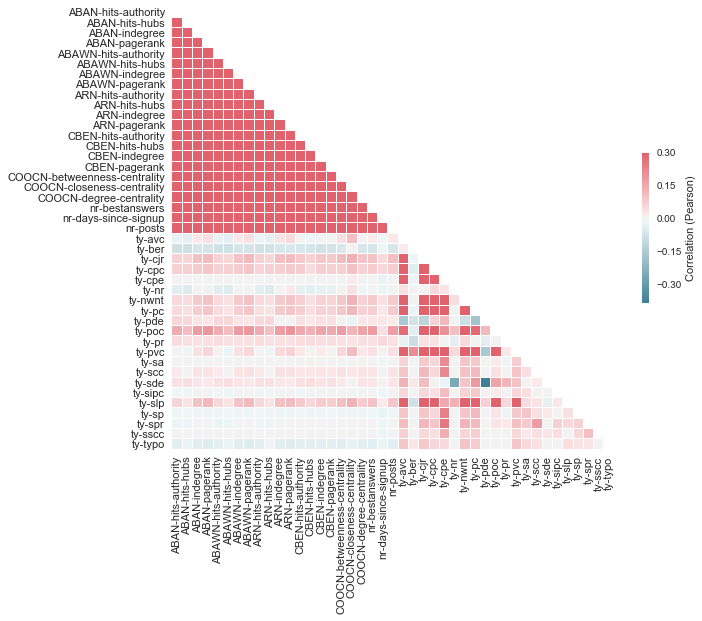

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": .3, 'label': 'Correlation ({})'.format(CORR_METHOD)})
hm.set(xticklabels=corr.columns.values, yticklabels=corr.columns)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tight_layout(pad=0.1)

for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'feats_collinearity_{}'.format(CORR_METHOD) + plot_format)

## Variance

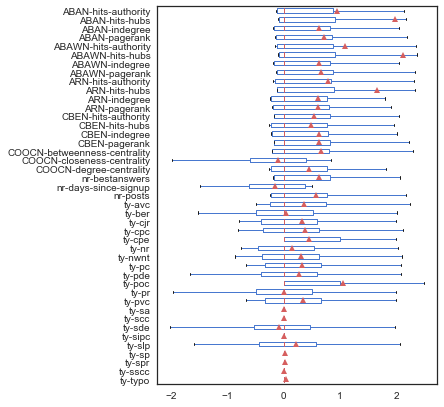

In [24]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5.5))

df_bxplt = df_feats.drop(meta_cols, axis=1)

# reverse cols order
df_bxplt[df_bxplt.columns[::-1]].boxplot(vert=False, 
                                         showfliers=False, 
                                         showmeans=True)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(alpha=0)
plt.tight_layout(pad=0.1)

for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'feats_variance' + plot_format)